# 하이퍼 파라미터 최적화

In [6]:
#https://www.tensorflow.org/tutorials/keras/keras_tuner
#Prediction of penetration depth in high power laser welding

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import copy

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras import metrics
from kerastuner.tuners import Hyperband

from sklearn.model_selection import train_test_split

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 5)):    #hidden layer의 개수를 2개부터 5개까지
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=16,
                                            max_value=64,
                                            step=16),    #layer의 node 개수를 16개부터 64개까지 16개의 간격으로
                               activation='relu'))
    model.add(layers.Dense(1))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),   #Adam에서 학습률은 3개 중에서
        loss='mse',metrics=['mae'])
    return model    

''' SNN 모델 node 개수와 학습률에 대해서만 최적화하기
def build_model(hp):
    model = Sequential()
    hp_units = hp.Int('units', min_value = 8, max_value = 64, step = 8)
    model.add(layers.Dense(units = hp_units, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',metrics=['mae'])
    return model              
'''

xy = np.loadtxt('C:/Temp/steel_laser.csv', delimiter=',', dtype=np.float32)

# 1: laser power, 2: Welding speed, 3: Beam diameter, 4: Penetration depth
x_data = xy[:, 0:-1]
#x_org = copy.deepcopy(x_data)

# Normalizing data
x_data -= x_data.mean(axis=0)
x_data /= x_data.std(axis=0)

y_data = xy[:, [-1]]

#원래는 데이터 나눠서 train데이터로 정규화해야함
ymean = y_data.mean(axis=0)
ystd = y_data.std(axis=0)

y_data -= ymean
y_data /= ystd 

# split data: Training data를 80%
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, 
				       train_size=0.80, random_state=42)



In [2]:
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=100,                                # 이거는 랜덤으로 100번까지 찾는 방법
    executions_per_trial=3,
    directory='./Data/',
    project_name='Keras Tuner Test')

tuner.search(x_train, y_train,
             epochs=50,
             validation_data=(x_val, y_val))                  
                                    
tuner.search_space_summary()
tuner.results_summary()
                  
# check results
models = tuner.get_best_models(num_models=3)


Trial 100 Complete [00h 00m 09s]
val_mae: 0.15047350029150644

Best val_mae So Far: 0.1288587599992752
Total elapsed time: 00h 16m 14s
INFO:tensorflow:Oracle triggered exit
Search space summary
Default search space size: 7
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 's

Trial 237 Complete [00h 00m 19s]
val_mae: 0.1390775442123413

Best val_mae So Far: 0.11779389530420303
Total elapsed time: 00h 12m 24s
INFO:tensorflow:Oracle triggered exit
The hyperparameter search is complete. The optimal number of layer is 2
The number of units in each hidden layer is
32
16
The optimal learning rate for the optimizer is 0.01
Epoch 1/200
10/10 [==============================] - 1s 52ms/step - loss: 0.5475 - mae: 0.5233 - val_loss: 0.2873 - val_mae: 0.4240
Epoch 2/200
10/10 [==============================] - 0s 13ms/step - loss: 0.1614 - mae: 0.3076 - val_loss: 0.1519 - val_mae: 0.2734
Epoch 3/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0830 - mae: 0.2128 - val_loss: 0.1328 - val_mae: 0.2450
Epoch 4/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0695 - mae: 0.1900 - val_loss: 0.1182 - val_mae: 0.2374
Epoch 5/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0632 - mae: 0.1774 - val_loss: 0.1330 - val_mae: 

10/10 [==============================] - 0s 8ms/step - loss: 0.0290 - mae: 0.1165 - val_loss: 0.0435 - val_mae: 0.1502
Epoch 61/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0276 - mae: 0.1178 - val_loss: 0.0584 - val_mae: 0.1733
Epoch 62/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0292 - mae: 0.1140 - val_loss: 0.0741 - val_mae: 0.2018
Epoch 63/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0352 - mae: 0.1265 - val_loss: 0.0487 - val_mae: 0.1382
Epoch 64/200
10/10 [==============================] - 0s 16ms/step - loss: 0.0269 - mae: 0.1145 - val_loss: 0.0485 - val_mae: 0.1493
Epoch 65/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0227 - mae: 0.1067 - val_loss: 0.0427 - val_mae: 0.1391
Epoch 66/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0225 - mae: 0.1044 - val_loss: 0.0565 - val_mae: 0.1473
Epoch 67/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0293 - mae:

Epoch 122/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0192 - mae: 0.0947 - val_loss: 0.0511 - val_mae: 0.1724
Epoch 123/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0261 - mae: 0.1118 - val_loss: 0.0492 - val_mae: 0.1648
Epoch 124/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0250 - mae: 0.1248 - val_loss: 0.0398 - val_mae: 0.1437
Epoch 125/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0207 - mae: 0.1086 - val_loss: 0.0554 - val_mae: 0.1645
Epoch 126/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0247 - mae: 0.1058 - val_loss: 0.0430 - val_mae: 0.1530
Epoch 127/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0236 - mae: 0.1125 - val_loss: 0.0550 - val_mae: 0.1622
Epoch 128/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0222 - mae: 0.1131 - val_loss: 0.0500 - val_mae: 0.1454
Epoch 129/200
10/10 [==============================] - 0s 6ms/step - 

10/10 [==============================] - 0s 6ms/step - loss: 0.0150 - mae: 0.0902 - val_loss: 0.0372 - val_mae: 0.1368
Epoch 184/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0186 - mae: 0.0917 - val_loss: 0.0442 - val_mae: 0.1376
Epoch 185/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0186 - mae: 0.0930 - val_loss: 0.0387 - val_mae: 0.1385
Epoch 186/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0152 - mae: 0.0842 - val_loss: 0.0499 - val_mae: 0.1575
Epoch 187/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0184 - mae: 0.0899 - val_loss: 0.0391 - val_mae: 0.1349
Epoch 188/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0147 - mae: 0.0827 - val_loss: 0.0472 - val_mae: 0.1427
Epoch 189/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0204 - mae: 0.0994 - val_loss: 0.0440 - val_mae: 0.1362
Epoch 190/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0141 -

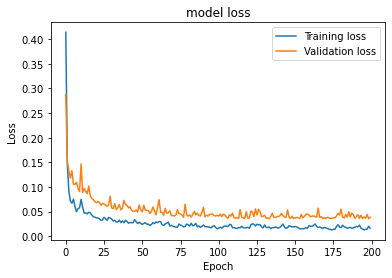

In [9]:
# 이거는 hyperband tuner 사용하는 방법
tuner = Hyperband(build_model,
                     objective = 'val_mae',
                     max_epochs = 200,
                     factor = 3,                              #SNN 모델의 경우 factor의 갯수는 2
                     directory = './Data',
                     project_name = 'hyperband')      

tuner.search(x_train, y_train, epochs = 50, validation_data = (x_val, y_val))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print('The hyperparameter search is complete. The optimal number of layer is', best_hps.get('num_layers'))
print('The number of units in each hidden layer is')
for i in range(best_hps.get('num_layers')):
    print(best_hps.get('units_'+str(i)))
print ('The optimal learning rate for the optimizer is', best_hps.get('learning_rate'))

'''SNN 모델 node 개수와 학습률에 대해서만 최적화할 경우 사용
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print('The hyperparameter search is complete.')
print(best_hps.get('units'))
print ('The optimal learning rate for the optimizer is', best_hps.get('learning_rate'))
'''

# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history=model.fit(x_train, y_train, epochs = 200, validation_data = (x_val, y_val))

# 교재 Fig. 3-9
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
